2023-09-05 07:49:24.134 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-09-05 07:49:24.149 Session state does not function when running a script without `streamlit run`


[*********************100%%**********************]  1 of 1 completed
Epoch 1/1000
10/10 [==============================] - 9s 14ms/step - loss: 0.0262
Epoch 2/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 3/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 4/1000
10/10 [==============================] - 0s 11ms/step - loss: 7.9730e-04
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 4.3759e-04
Epoch 6/1000
10/10 [==============================] - 0s 8ms/step - loss: 3.4198e-04
Epoch 7/1000
10/10 [==============================] - 0s 8ms/step - loss: 3.1979e-04
Epoch 8/1000
10/10 [==============================] - 0s 8ms/step - loss: 3.2627e-04
Epoch 9/1000
10/10 [==============================] - 0s 8ms/step - loss: 3.4316e-04
Epoch 10/1000
10/10 [==============================] - 0s 8ms/step - loss: 3.1335e-04
Epoch 11/1000
10/10 [==============================] - 0s 9ms/step - loss: 2.9643e-04
E

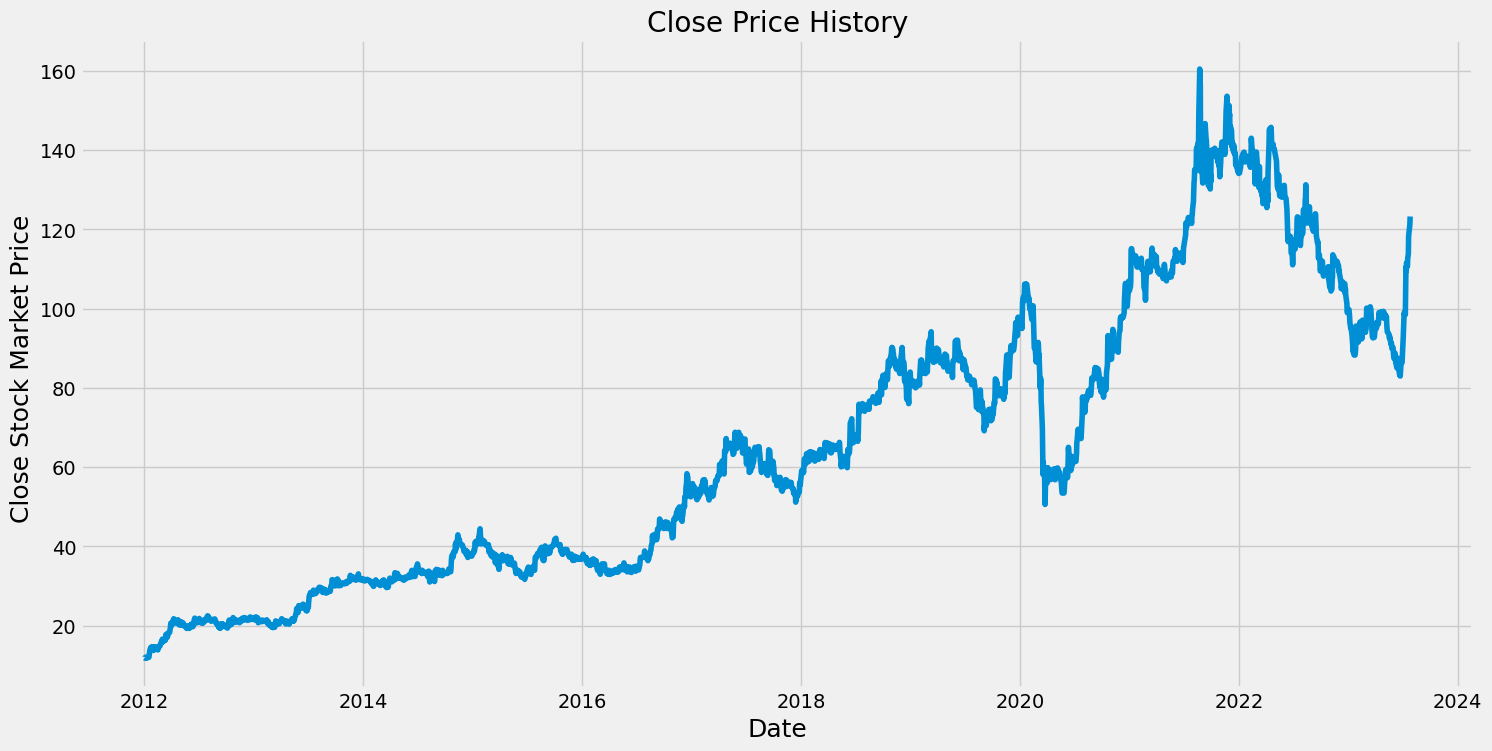

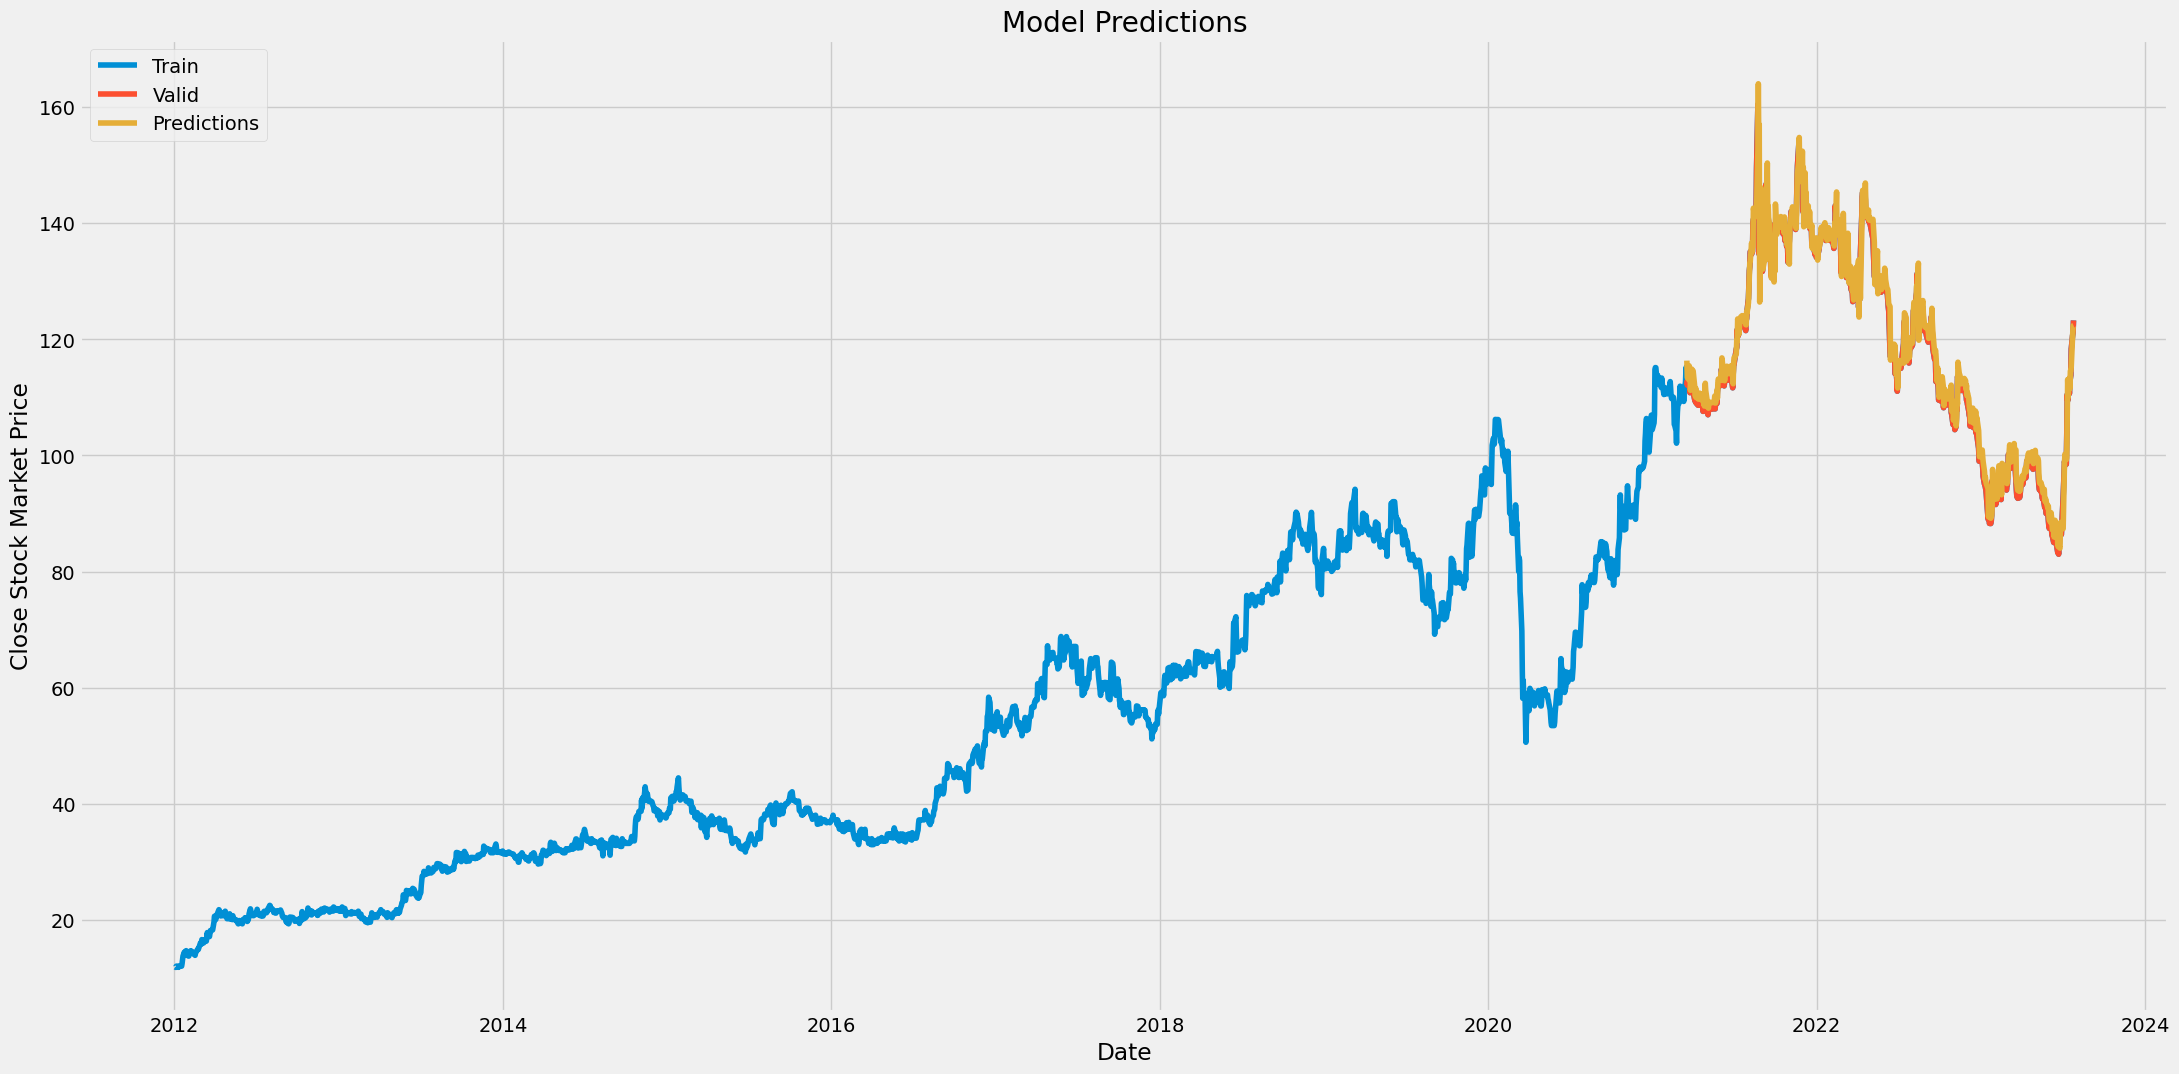

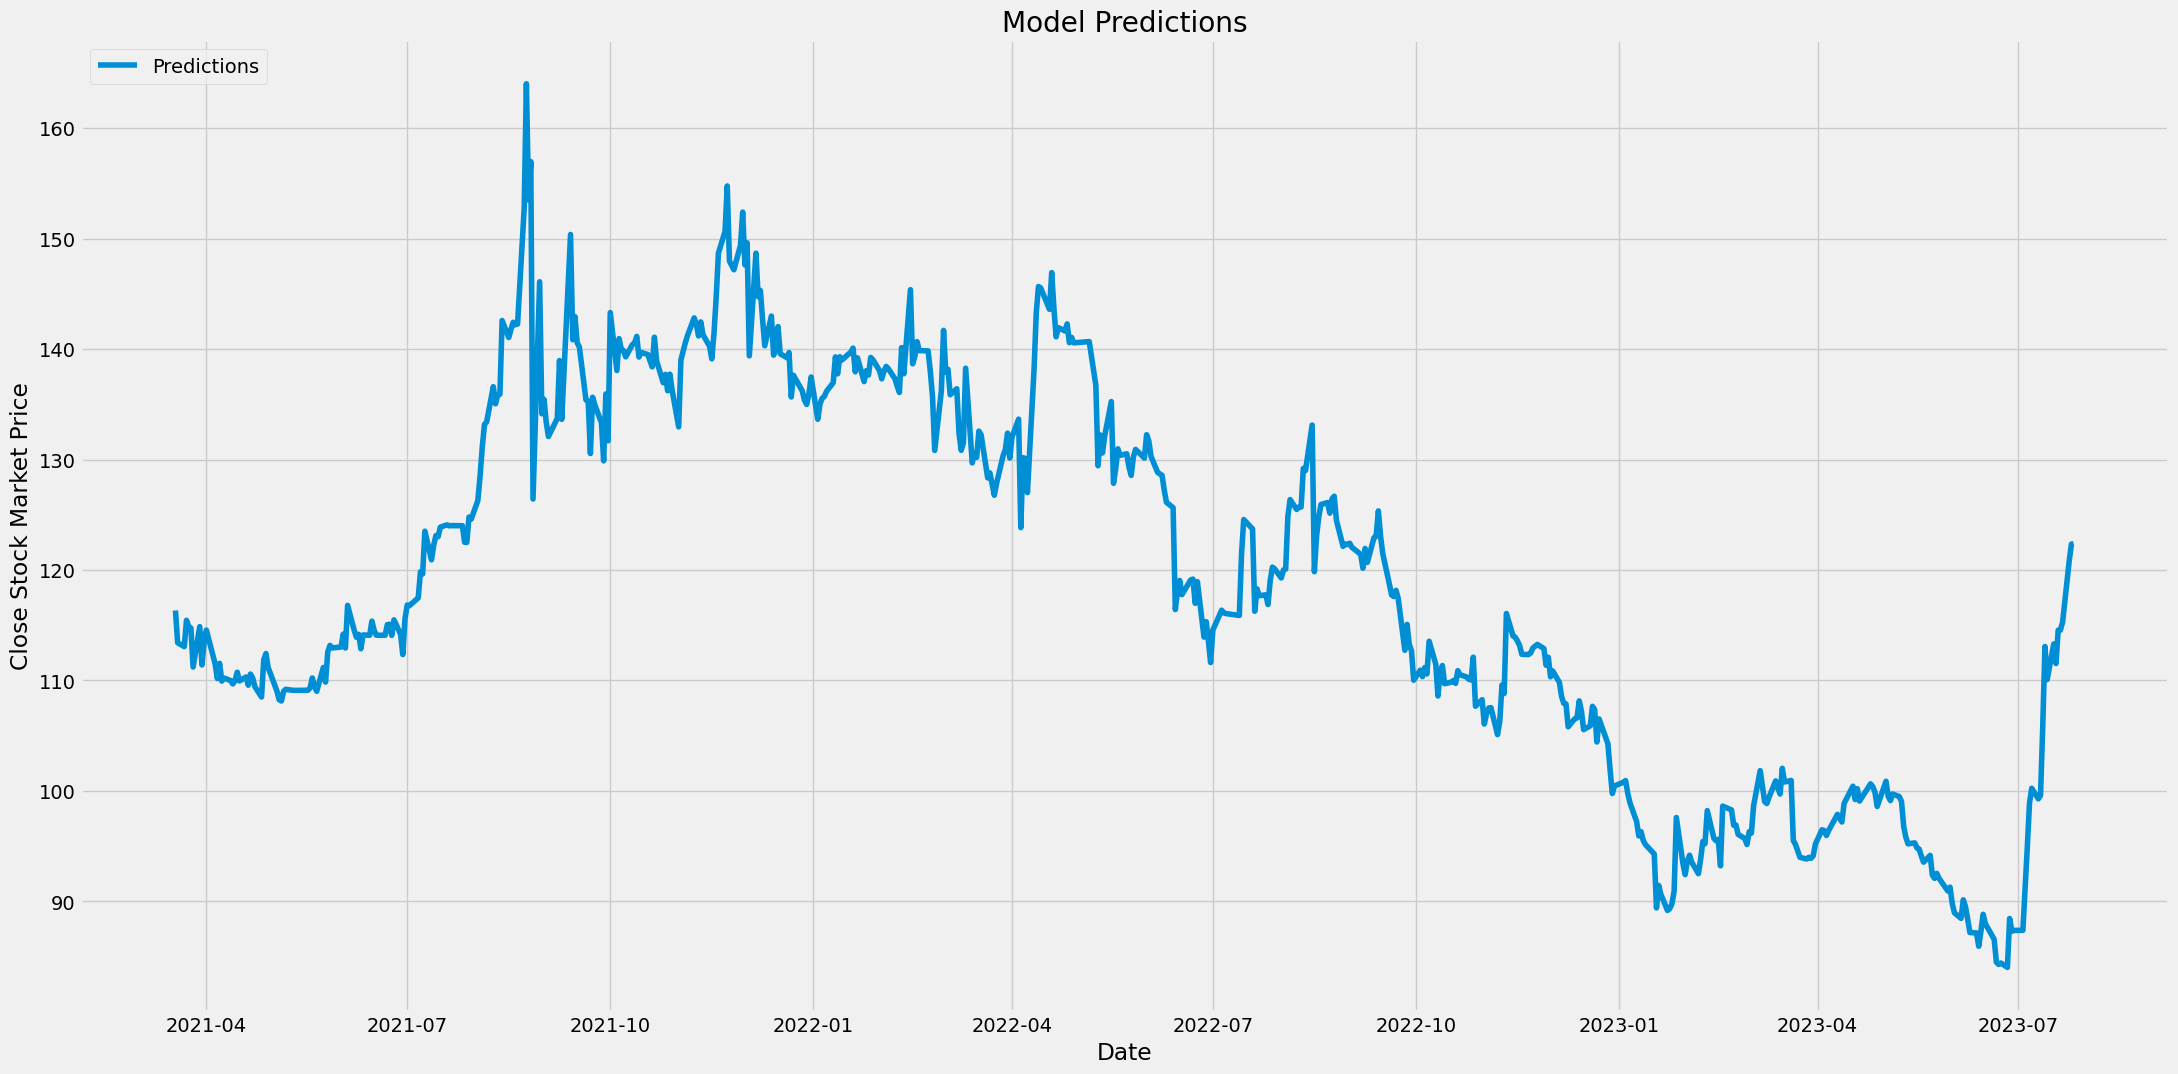

In [3]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from PIL import Image
import yfinance as yf
import math

# Streamlit app
def main():
    st.write('''
    # Stock Price Prediction Web Application
    Visualize and Predict The Stock Prices
    ''')
    # Add Image
    '''image = Image.open("C:/Users/M Saad/Desktop/Python_ws/Stock image.png")
    st.image(image, use_column_width=True)'''
    n_years = st.slider("Years of Prediction", 1, 4)
    period = n_years * 365

    # Create a sidebar header
    st.sidebar.header('User Input')

    # Get user input for stock and date range
    stock_symbol = st.sidebar.text_input("Enter Stock Symbol ", "MEBL.KA")
    start_date = st.sidebar.text_input("Enter Start Date (YYYY-MM-DD)", "2012-01-01")
    end_date = st.sidebar.text_input("Enter End Date (YYYY-MM-DD)", "2023-07-30")

    # Download stock data using yfinance
    df = yf.download(stock_symbol, start=start_date, end=end_date)

    # Display stock data
    st.subheader('Stock Data')
    st.write(df)

    # Plot closing price history
    plt.figure(figsize=(16, 8))
    plt.plot(df['Close'])
    plt.title('Close Price History')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Stock Market Price ', fontsize=18)
    st.subheader('Closing Price History')
    st.pyplot(plt)

    # Create a new DataFrame with only the 'Close' column
    data = df.filter(['Close'])

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Get the training data length
    training_data_len = math.ceil(len(scaled_data) * 0.8)

    # Create the training data set
    train_data = scaled_data[0:training_data_len, :]
    x_train, y_train = [], []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=250, epochs=1000)

    # Test the model
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []

    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Create DataFrame for predictions
    valid = pd.DataFrame()
    valid['Close'] = data[training_data_len:]['Close']
    valid['Predictions'] = predictions


    # Plot predictions
    plt.figure(figsize=(24, 12))
    plt.plot(data['Close'], label='Actual Close Price')
    plt.plot(valid[['Close', 'Predictions']])
    plt.title('Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Close Stock Market Price')
    plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
    st.subheader('Model Predictions')
    st.pyplot(plt)

    # Display predicted prices
    st.subheader('Predicted Prices')
    st.write(valid)

     # Plot predictions
    plt.figure(figsize=(24, 12))
    plt.plot(label='Actual Close Price')
    plt.plot(valid[['Predictions']])
    plt.title('Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Close Stock Market Price')
    plt.legend(['Predictions'], loc='upper left')
    st.subheader('Model Predictions')
    st.pyplot(plt)


if __name__ == '__main__':
    main()
